In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress

In [2]:
#Importing DataFrame
file_path = 'Resources/Clean_EV_Data.csv'
df = pd.read_csv(file_path)

df

,Unnamed: 0,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
1,3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
2,4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500
3,5,5YJ3E1EB5J,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,475635324,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,53061051916
4,6,1N4AZ0CP4D,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38.0,253546023,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,53061040900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112343,112629,7SAYGDEF2N,King,Duvall,WA,98019,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,217955265,POINT (-121.98609 47.74068),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032401
112344,112630,1N4BZ1CP7K,San Juan,Friday Harbor,WA,98250,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,40.0,103663227,POINT (-123.01648 48.53448),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,53055960301
112345,112631,1FMCU0KZ4N,King,Vashon,WA,98070,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,34.0,193878387,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033027702
112346,112632,KNDCD3LD4J,King,Covington,WA,98042,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,47.0,125039043,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032007


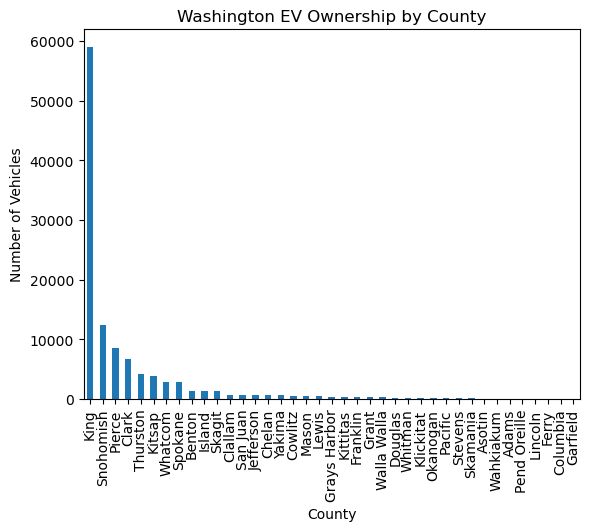

In [3]:
#Ownership by county
county_count = df['County'].value_counts()

county_count.plot(kind='bar',title='Washington EV Ownership by County',xlabel='County',ylabel='Number of Vehicles')

plt.show()

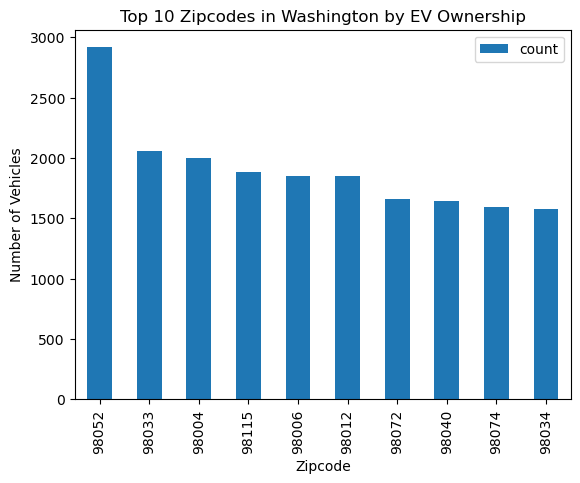

In [4]:
#Ownership by zipcode
zip_count = df['Postal Code'].value_counts()
zip_count_df = pd.DataFrame(zip_count)

#Narrowing DataFrame to only top 10 zipcodes with most EV ownership
zip_df = zip_count_df.nlargest(10,columns=['count'])
zip_df

zip_df.plot(kind='bar',title='Top 10 Zipcodes in Washington by EV Ownership',xlabel='Zipcode',ylabel='Number of Vehicles')

plt.show()

In [5]:
#Charging Stations by zipcode
charging_station_file_path = 'Resources/charging_stations(2022).csv'
cs_df = pd.read_csv(charging_station_file_path)
# cs_df

#Narrowing DataFrame to only top 10 zipcodes with most EV ownership
narrow_cs_df = cs_df.nlargest(10,columns=['Number of Charging Stations'])
narrow_cs_df

# narrow_cs_df.plot(kind='bar',title='Top 10 Zipcodes in Washington by EV Ownership',xlabel='Zipcode',ylabel='Number of Vehicles')

# plt.show()

,Postal Code,Number of Charging Stations
2,98004,116
64,98121,99
20,98109,82
162,99354,55
58,98104,47
84,98101,45
32,98005,44
123,98188,35
15,98501,28
0,98052,27


In [6]:
zip_count_to_merge = zip_count_df.reset_index()

merge_df = pd.merge(zip_count_to_merge, cs_df)
filtered_merge_df = merge_df.nlargest(10,columns=['count'])

filtered_merge_df

,Postal Code,count,Number of Charging Stations
0,98052,2916,27
1,98033,2059,20
2,98004,2001,116
3,98115,1880,6
4,98006,1852,14
5,98012,1850,2
6,98072,1661,16
7,98040,1639,11
8,98074,1594,3
9,98034,1578,15


The r-value is 0.46


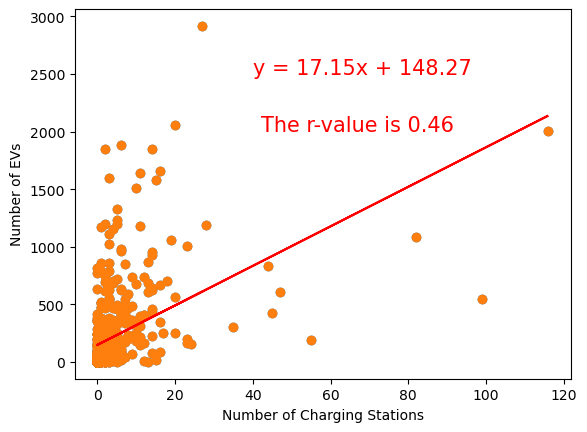

In [26]:
plt.scatter(merge_df['Number of Charging Stations'],merge_df['count'])

x_values = merge_df['Number of Charging Stations']
y_values = merge_df['count']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
rvalue = str(round(rvalue, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(40,2500), fontsize=15, color='red')
plt.annotate(f'The r-value is {rvalue}',(42,2000), fontsize=15, color='red')
plt.xlabel('Number of Charging Stations')
plt.ylabel('Number of EVs')
print(f'The r-value is {rvalue}')

In [8]:
census_file_path = 'Resources/2022_census.csv'
census_df = pd.read_csv(census_file_path)

census_merge_df = pd.merge(zip_count_to_merge, census_df)

census_merge_df

,Postal Code,count,Census Year,Median Household Income,Income Per Capita,Population
0,98052,2916,2022,158457,82929.0,77324
1,98033,2059,2022,163786,102001.0,40425
2,98004,2001,2022,157784,117764.0,39161
3,98115,1880,2022,141013,80879.0,54457
4,98006,1852,2022,185991,84234.0,39753
...,...,...,...,...,...,...
491,98263,1,2022,113750,38803.0,178
492,98326,1,2022,44321,23750.0,1066
493,98283,1,2022,58309,21288.0,466
494,98530,1,2022,61719,21641.0,558


The r-value is 0.6821588955833698


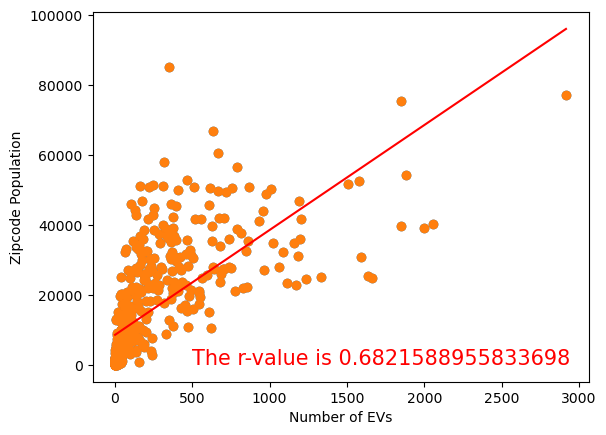

In [9]:
#Population Scatterplot
plt.scatter(census_merge_df['count'],census_merge_df['Population'])

x_values = census_merge_df['count']
y_values = census_merge_df['Population']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(6000,60), fontsize=15, color='red')
plt.annotate(f'The r-value is {rvalue}',(500,50), fontsize=15, color='red')
plt.xlabel('Number of EVs')
plt.ylabel('Zipcode Population')
print(f'The r-value is {rvalue}')

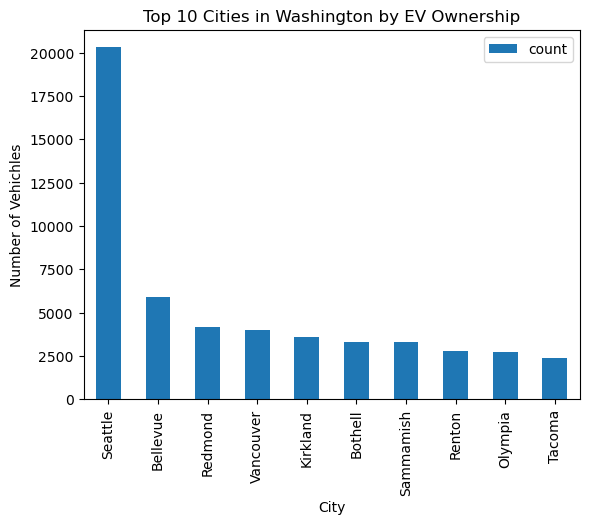

In [10]:
#Ownership by city
city_count = df['City'].value_counts()
city_count_df = pd.DataFrame(city_count)

#Narrowing DataFrame to only top 10 cities with most EV ownership
city_df = city_count_df.nlargest(10,columns=['count'])
city_df

city_df.plot(kind='bar',title='Top 10 Cities in Washington by EV Ownership',xlabel='City',ylabel='Number of Vehichles')

plt.show()

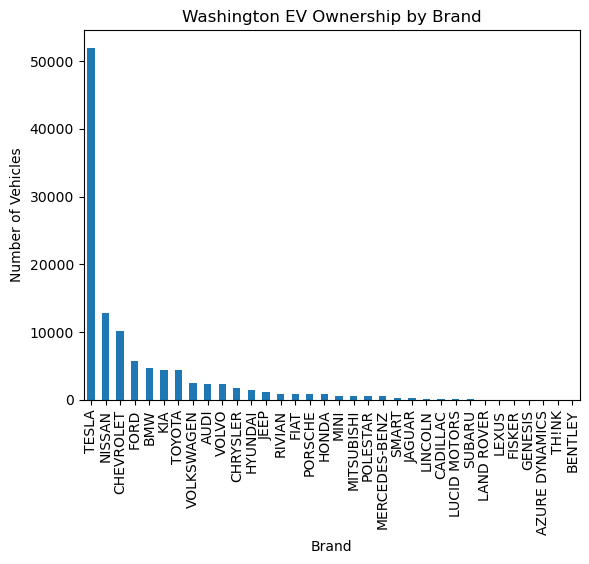

In [11]:
#Ownership by brand
brand_count = df['Make'].value_counts()

brand_count.plot(kind='bar',title='Washington EV Ownership by Brand',xlabel='Brand',ylabel='Number of Vehicles')

plt.show()

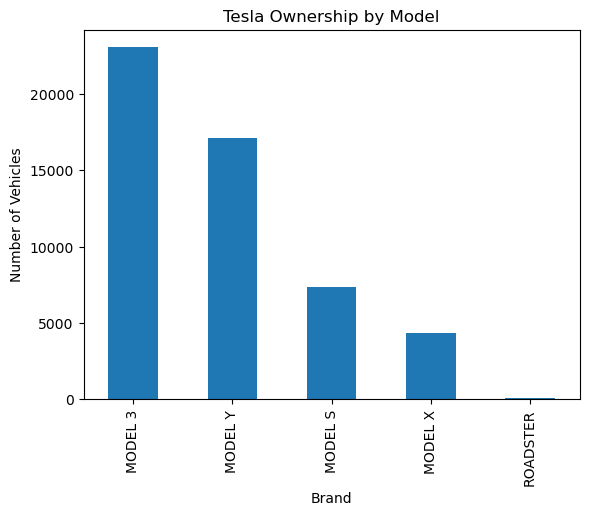

In [12]:
#Most popular Tesla models
tesla_filt = df['Make'] == 'TESLA'
tesla_df = df[tesla_filt]

tesla_model_count = tesla_df['Model'].value_counts()
tesla_model_count.plot(kind='bar',title='Tesla Ownership by Model',xlabel='Brand',ylabel='Number of Vehicles')

plt.show()

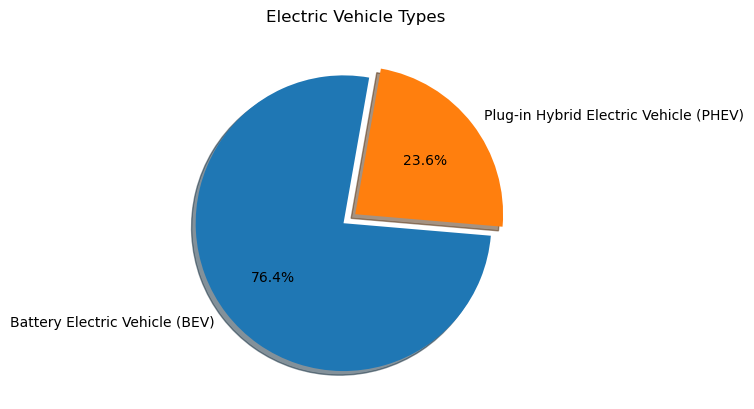

In [13]:
#BEV vs PHEV ownership
ev_type_count = df['Electric Vehicle Type'].value_counts()
explode = (0.1, 0)
ev_type_count.plot(kind='pie',title='Electric Vehicle Types',explode=explode,
                    autopct="%1.1f%%", shadow=True, startangle=80,ylabel='')

plt.show()